<a href="https://colab.research.google.com/github/Jrodmath/Sketchcodes/blob/main/ch6FirstNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

torch.Size([11, 1])

In [3]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 9,  3, 10,  8,  4,  6,  1,  2,  5]), tensor([0, 7]))

In [4]:

t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [5]:
import torch.nn as nn

linear_model = nn.Linear(1, 1) # <1>
linear_model(t_un_val)

tensor([[0.0792],
        [0.3920]], grad_fn=<AddmmBackward>)

In [6]:
linear_model.weight

Parameter containing:
tensor([[-0.2250]], requires_grad=True)

In [7]:
linear_model.bias

Parameter containing:
tensor([0.8824], requires_grad=True)

In [8]:
x = torch.ones(1)
linear_model(x)

tensor([0.6574], grad_fn=<AddBackward0>)

In [9]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[0.6574],
        [0.6574],
        [0.6574],
        [0.6574],
        [0.6574],
        [0.6574],
        [0.6574],
        [0.6574],
        [0.6574],
        [0.6574]], grad_fn=<AddmmBackward>)

In [10]:
linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(
    linear_model.parameters(), # <2>
    lr=1e-2)

In [11]:
linear_model.parameters()

<generator object Module.parameters at 0x7f7a219d16d0>

In [12]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.3450]], requires_grad=True), Parameter containing:
 tensor([0.9120], requires_grad=True)]

In [13]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [14]:
linear_model = nn.Linear(1,1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000,
    optimizer = optimizer, 
    model = linear_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val
)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 287.9638, Validation loss 6.3163
Epoch 1000, Training loss 5.6204, Validation loss 10.5369
Epoch 2000, Training loss 3.4448, Validation loss 2.3324
Epoch 3000, Training loss 3.0955, Validation loss 2.1791

Parameter containing:
tensor([[5.3592]], requires_grad=True)
Parameter containing:
tensor([-17.2289], requires_grad=True)


In [15]:
seq_model = nn.Sequential(
    nn.Linear(1,13),
    nn.Tanh(),
    nn.Linear(13,1)
)
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [16]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [18]:
for name, param in seq_model.named_parameters():
    print(name,param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [19]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1,8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8,1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [20]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [21]:
seq_model.output_linear.bias

Parameter containing:
tensor([-0.0958], requires_grad=True)

In [22]:
optimizer = optim.SGD(seq_model.parameters(), lr = 1e-3)

In [26]:
training_loop(
    n_epochs = 5000,
    optimizer = optimizer, 
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val
)

print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 214.5271, Validation loss 10.2467
Epoch 1000, Training loss 8.2687, Validation loss 4.7956
Epoch 2000, Training loss 5.9675, Validation loss 1.1775
Epoch 3000, Training loss 3.0853, Validation loss 4.6521
Epoch 4000, Training loss 2.2404, Validation loss 7.5290
Epoch 5000, Training loss 1.9662, Validation loss 9.1194
output tensor([[ 3.2542],
        [-0.4773]], grad_fn=<AddmmBackward>)
answer tensor([[ 0.5000],
        [-4.0000]])
hidden tensor([[  0.0499],
        [-14.1667],
        [-16.9453],
        [-17.0384],
        [  0.3582],
        [-17.2601],
        [ -0.9232],
        [  0.6668]])


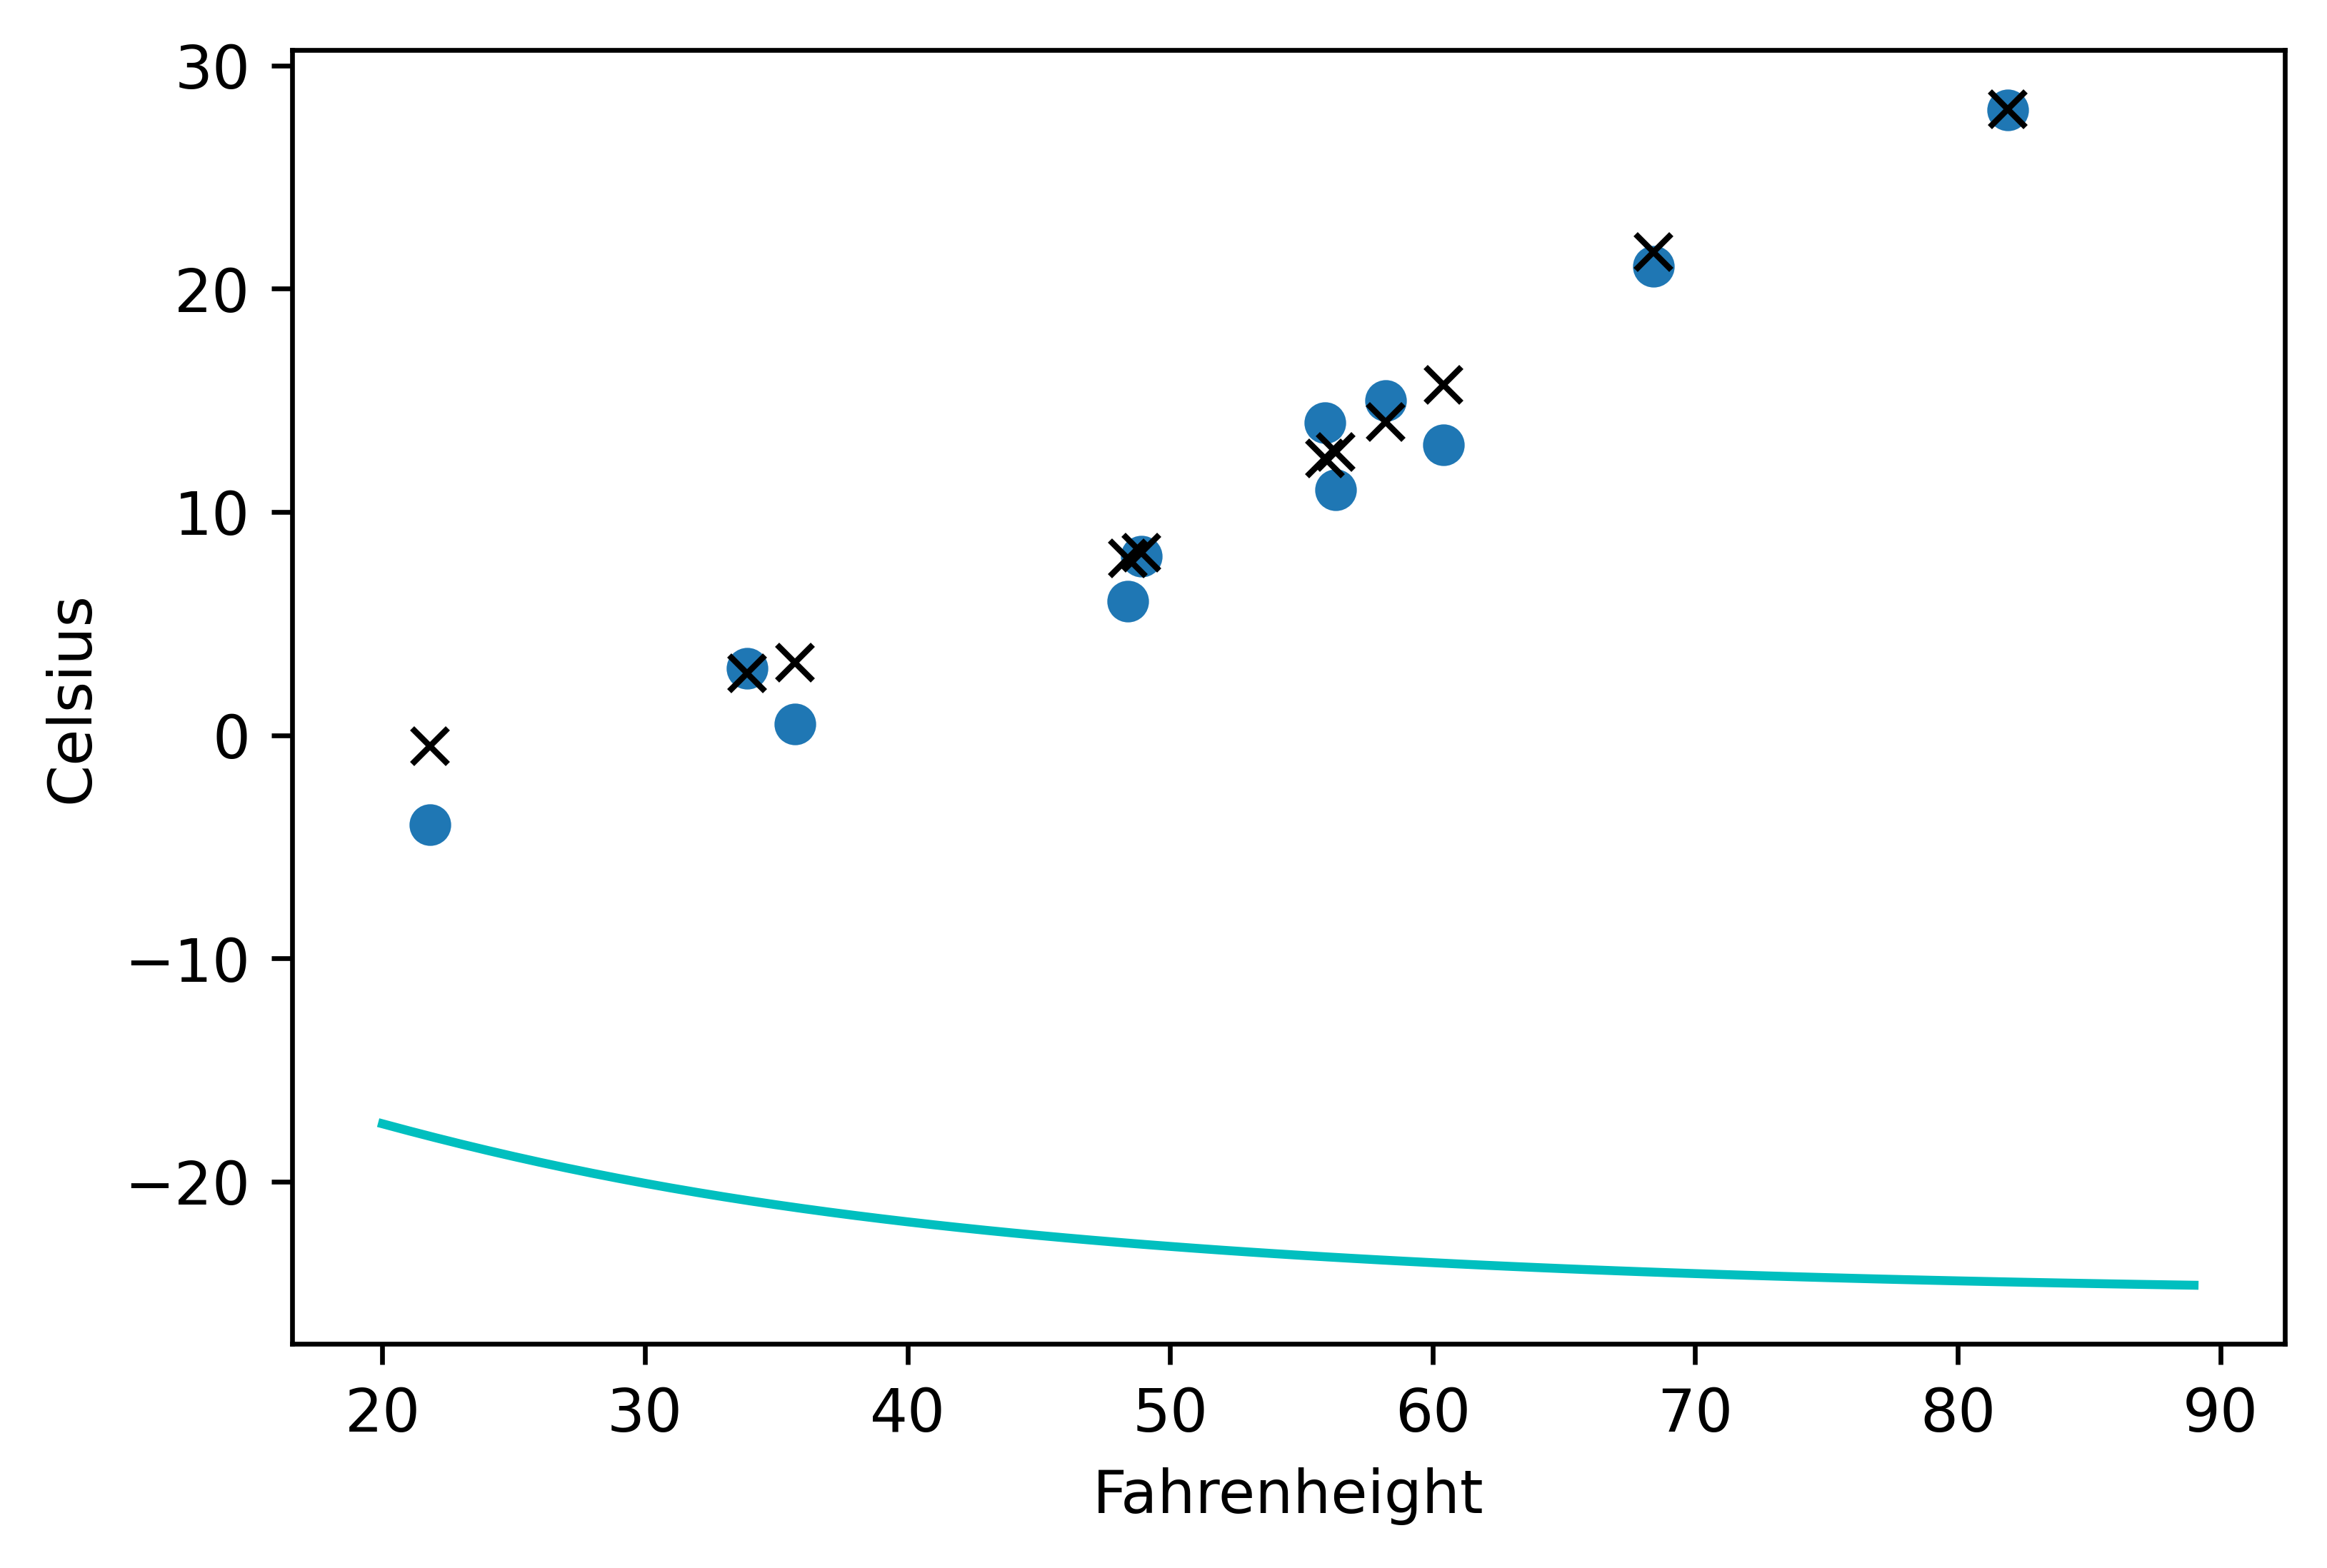

In [28]:
from matplotlib import pyplot as plt

t_range = torch.arange(20.,90.).unsqueeze(1)
fig = plt.figure(dpi = 600)
plt.xlabel("Fahrenheight")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(-.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')